In [1]:
from PASCALLoader import getPascalLoader
from cocoLoader import CocoDataset
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
import torchvision.transforms as transforms
transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])

In [3]:
pascalDL = getPascalLoader('pascalvoc.csv', 16, True, transform)

In [4]:
import pandas as pd
df = pd.read_csv('pascalvoc.csv')
df['class'].value_counts()

1     5974
17     845
18     805
16     730
5      584
3      455
7      402
9      311
20     279
21     264
19     244
72     190
2      185
44     185
4      180
62     178
6      154
64     145
63      98
67      28
Name: class, dtype: int64

ground truth image shape: torch.Size([16, 3, 256, 256])
blurred image shape: torch.Size([16, 3, 256, 256])
class shape: torch.Size([16])


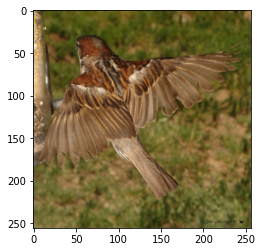

Label: 16


In [5]:
import matplotlib.pyplot as plt
data = next(iter(pascalDL))
print(f"ground truth image shape: {data['image'].size()}")
print(f"blurred image shape: {data['inputImg'].size()}")
print(f"class shape: {data['class'].size()}")
img = data['image'][4].squeeze()
label = data['class'][4]
plt.imshow(img.permute(1,2,0))
plt.show()
print(f"Label: {label}")

In [6]:
from torch.utils.data import DataLoader
cocoData = CocoDataset('train2014', 'annotations/instances_train2014.json', transform=transform)
cocoDL = DataLoader(cocoData, batch_size=16, shuffle=True)

loading annotations into memory...
Done (t=10.74s)
creating index...
index created!
6671


ground truth image shape: torch.Size([16, 3, 256, 256])
blurred image shape: torch.Size([16, 3, 256, 256])
class shape: torch.Size([16])


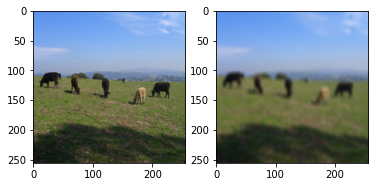

Label: 21


In [7]:
data = next(iter(cocoDL))
print(f"ground truth image shape: {data['image'].size()}")
print(f"blurred image shape: {data['inputImg'].size()}")
print(f"class shape: {data['class'].size()}")
img = data['image'][4].squeeze()
blurred_img = data['inputImg'][4].squeeze()
label = data['class'][4]
fig,axs = plt.subplots(1,2)
axs[0].imshow(img.permute(1,2,0))
axs[1].imshow(blurred_img.permute(1,2,0))
plt.show()
print(f"Label: {label}")

ground truth image shape: torch.Size([16, 3, 256, 256])
blurred image shape: torch.Size([16, 3, 256, 256])
class shape: torch.Size([16])


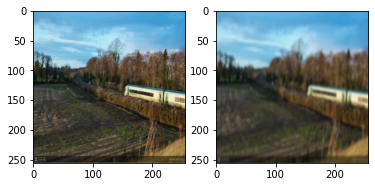

Label: 7


In [8]:
data = next(iter(cocoDL))
print(f"ground truth image shape: {data['image'].size()}")
print(f"blurred image shape: {data['inputImg'].size()}")
print(f"class shape: {data['class'].size()}")
img = data['image'][14].squeeze()
blurred_img = data['inputImg'][14].squeeze()
label = data['class'][14]
fig,axs = plt.subplots(1,2)
axs[0].imshow(img.permute(1,2,0))
axs[1].imshow(blurred_img.permute(1,2,0))
plt.show()
print(f"Label: {label}")